# Power Outage Clusters in New York City's Low Income Neighborhoods

**Introduction**
On July 21, 2019, Consolidated Edison Company of New York (Con Ed), the power utility company for New York City, made the decision to take 33K customers in southeast Brooklyn (including Canarsie and Flatlands) out of service "in order to protect vital equipment and to help restore power as soon as possible.” ConEd said that it had to "shut off the power for some neighborhoods to prevent a wider blackout." The outage lasted approximately 24 hours.
This event was very simliar to a 1999 outage in Manhattan, effecting all blocks north of 155th Street for approximately 18 hours. 
On July 17, 2006, Northwest Queens (Long Island City and Astoria) lost power for 5 daysand impacted 65K ccustomers. 
According to the US Census, Median Household Income for all of the areas of New York City mentioned above is less than $65K.

**Hypothesis:**
Power Outages in New York City are clustered in areas with lower median household incomes.

**Data:**
Because Con Ed does not provide historical power outage data, a log of 311 complaints to report power outages from April 2014 thorugh March 2020 was used utilized to determine the location of each power outage.



# Literature Review
<details>
  <summary>Click to expand</summary>
    
  ## Heading
  1. A numbered
  2. list
     * With some
     * Sub bullets
</details>


**Data Manipulation to find the Power Outage Complaint Rate (per 10K people) and Median Household Income by Block Group Centroid**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

import seaborn as sn

from sklearn.cluster import DBSCAN 

%matplotlib inline
plt.rcParams["figure.figsize"] = (5,7)

#read in two geodataframes
NYC_BlockGroup_Shapes = gpd.read_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\TIGER2018Shapefilebyblkgrp_NYC_countiesonly_wextraGEOIDColumnCopy_projected.shp')
NYC_PowerOutageLocations = gpd.read_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\PowerOutages311_AllNYC_2014to2020.shp')

In [2]:
#make sure both goedataframes are using the same projection
NYC_BlockGroup_Shapes.crs
NYC_PowerOutageLocations.crs

{'init': 'epsg:2263'}

In [104]:
NYC_PowerOutageLocations['OutageCount']=1 

In [105]:
#Spatial Join: Create a relationship between the power outage locations and the block groups that they 'intersect' or are within:
NYCBlockGroups_outage_intersect = gpd.sjoin(NYC_PowerOutageLocations, NYC_BlockGroup_Shapes, how='left', op='intersects')
#NYCBlockGroups_outage_intersect.to_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018NYCbyblkgrp_outageintersectMay2020.shp')

In [21]:
len(NYCBlockGroups_outage_intersect)

31825

In [84]:
#NYCBlockGroups_outage_intersect.info() #intersect worked..each power outage has been assigned to a block group

In [22]:
#Dissolve works but I can't export to a shapefile because it contains both point and multipoint geometry types 
#geopandas website says:'Note that all entries in a GeoSeries need not be of the same geometric type, 
#although certain export operations will fail if this is not the case.
NYCBlockGroups_outage_intersect_dissolve = NYCBlockGroups_outage_intersect.dissolve(by='GEO_ID_DBL',aggfunc=sum)
#NYCBlockGroups_outage_intersect_dissolve.to_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018NYCbyblkgrp_outage_dissolveMay2020.shp')

In [23]:
NYCBlockGroups_outage_intersect_dissolve.head()

geometry  Unique_Key  \
GEO_ID_DBL                                                                    
3.600500e+11                     POINT (1023183.000 235894.000)    34081967   
3.600500e+11  MULTIPOINT (1021877.000 235840.000, 1022098.00...   487870008   
3.600500e+11  MULTIPOINT (1023693.000 234511.000, 1023769.00...   104063348   
3.600500e+11  MULTIPOINT (1023480.000 236401.000, 1023719.00...   244959927   
3.600500e+11  MULTIPOINT (1024242.000 234521.000, 1024472.00...   384134879   

              Incident_Z  X_Coordina  Y_Coordina  ORIG_FID  OutageCount  \
GEO_ID_DBL                                                                
3.600500e+11       10473     1023183      235894        -1            1   
3.600500e+11      136149    13293276     3060178       -13           13   
3.600500e+11       31419     3071710      702501        -3            3   
3.600500e+11       73311     7165809     1651218        -7            7   
3.600500e+11      115203    11272923     2587811       -11           11   

              index_right      ALAND   AWATER  Shape_Leng  Shape_Area  
GEO_ID_DBL                                                             
3.600500e+11         4872    89013.0      0.0    0.013742    0.000010  
3.600500e+11        63349  2887352.0      0.0    0.553636    0.000308  
3.600500e+11         5106   505038.0      0.0    0.060649    0.000054  
3.600500e+11        34118   440118.0      0.0    0.100711    0.000047  
3.600500e+11        18755  3616635.0  60918.0    0.324420    0.000392

Text(0.5, 1, 'Power Outage Complaint Point Data Aggregated by New York City Block Group')

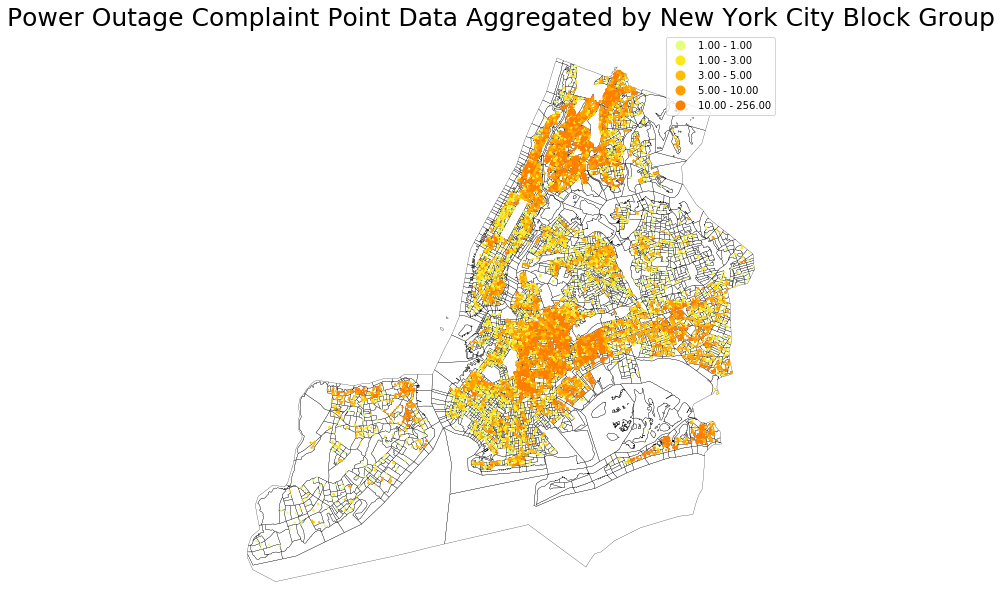

In [66]:
len(NYCBlockGroups_outage_intersect_dissolve)

#NTA_shapefile = gpd.read_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\nynta.shp')
#base = NYC_BlockGroup_Shapes.plot(ax=base,facecolor="none", edgecolor='blue', lw=2, label="NTA Boundary")
#NYCBlockGroups_outage_intersect_dissolve.plot(column='OutageCount',scheme='quantiles', edgecolor='black',cmap='Wistia',legend=True)
#plt.Axes.set_axis_off(base)
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,15)

base = NYC_BlockGroup_Shapes.plot(facecolor="none",edgecolor='black',lw=0.25,label="Block Group",legend=True)
NYCBlockGroups_outage_intersect_dissolve.plot(ax=base,column='OutageCount',scheme='quantiles',markersize=6,edgecolor='none',cmap='Wistia',legend=True)
plt.Axes.set_axis_off(base)
plt.legend
plt.title('Power Outage Complaint Point Data Aggregated by New York City Block Group',fontsize=25)
#work on legend formatting


In [106]:
#Attribute Join to attach population and median income data to new shapefile with outage count by block group.
#ACS data by block group for total population and median income
NYC_TotalPopbyBlockGroup = pd.read_csv(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018_SexbyAge_NYC_byblkgrpATTEMPT2.csv')
NYC_IncomebyBlockGroup=pd.read_csv(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACSDT5Y2018.B19013_MedianHHIncome_NYC_raw_2.csv')

NYC_IncomebyBlockGroup['MedHHInc_INT']=NYC_IncomebyBlockGroup['MedianHHIncome']
NYC_IncomebyBlockGroup['MedHHInc_INT'].replace('-','0',inplace=True)
NYC_IncomebyBlockGroup['MedHHInc_INT'].replace('250,000+','250000',inplace=True)
NYC_IncomebyBlockGroup['MedHHInc_INT']=pd.to_numeric(NYC_IncomebyBlockGroup['MedHHInc_INT'],errors='coerce')

NYC_IncomebyBlockGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID_TEX      6493 non-null   object
 1   GEO_ID_DBL      6493 non-null   int64 
 2   NAME            6493 non-null   object
 3   MedianHHIncome  6493 non-null   object
 4   MedHHInc_INT    6493 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 253.8+ KB


In [70]:
#Attribute Join -join population data to shapefile:
NYCOutageBlockGroups_wpop = NYCBlockGroups_outage_intersect_dissolve.merge(NYC_TotalPopbyBlockGroup,on='GEO_ID_DBL')

In [71]:
#join income data to same shapefile:
NYCOutageBlockGroups_wpopandinc = NYCOutageBlockGroups_wpop.merge(NYC_IncomebyBlockGroup,on='GEO_ID_DBL')

Text(0.5, 1, 'Total Population Joined to Power Outage Points with New York City Block Group Attributes')

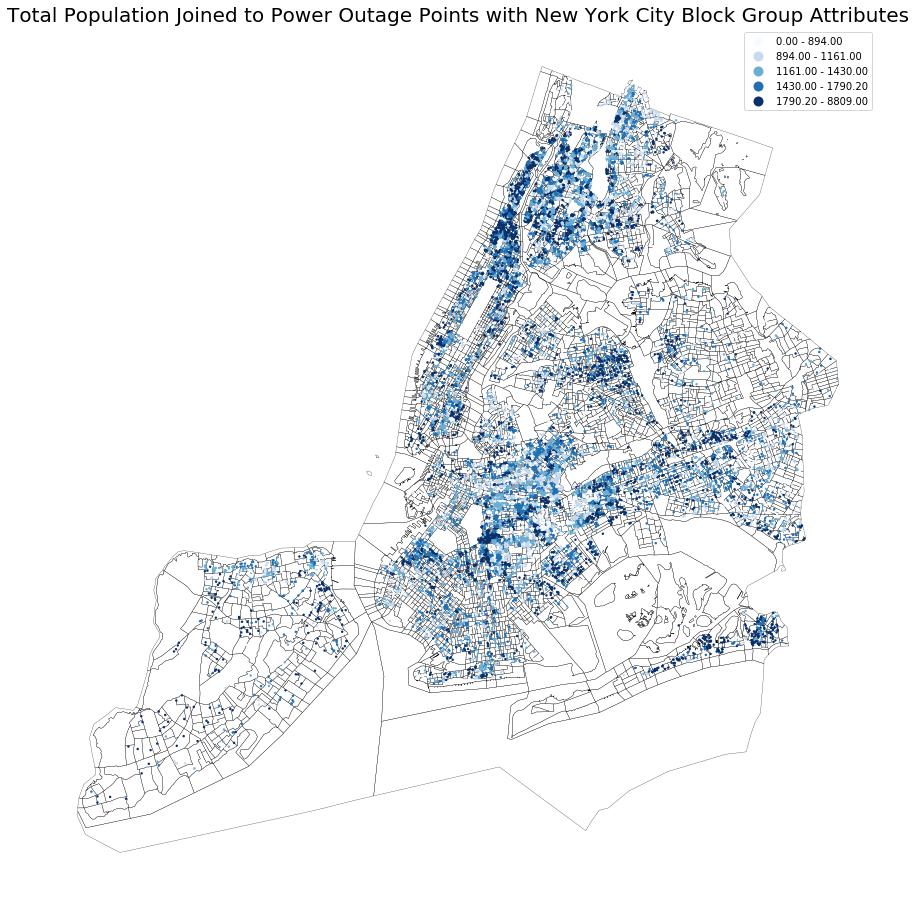

In [109]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,18)

base = NYC_BlockGroup_Shapes.plot(facecolor="none",edgecolor='black',lw=0.25,label="Block Group",legend=True)
NYCOutageBlockGroups_wpopandinc.plot(ax=base,column='Total_Population',scheme='quantiles',markersize=6,edgecolor='none',cmap='Blues',legend=True)
plt.Axes.set_axis_off(base)
plt.legend
plt.title('Total Population Joined to Power Outage Points with New York City Block Group Attributes',fontsize=20)

Text(0.5, 1, 'Median Household Income Joined to Power Outage Points with New York City Block Group Attributes')

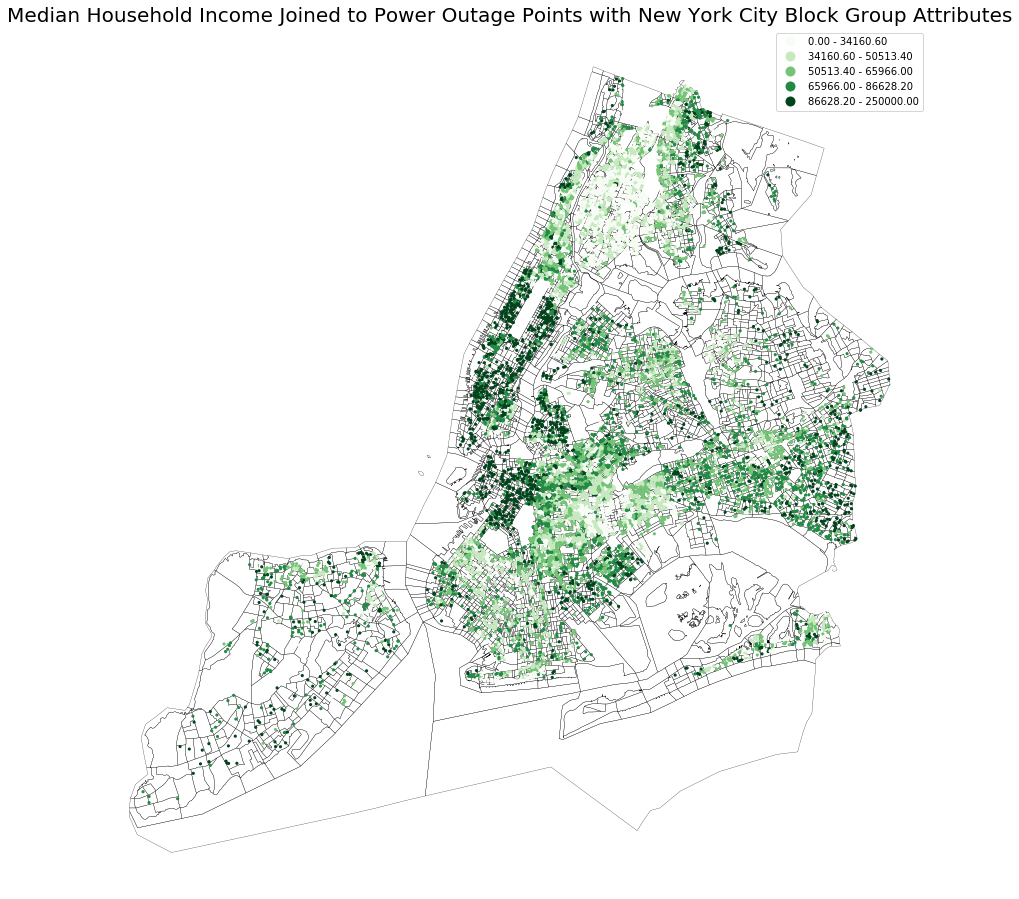

In [111]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,18)

base = NYC_BlockGroup_Shapes.plot(facecolor="none",edgecolor='black',lw=0.25,label="Block Group",legend=True)
NYCOutageBlockGroups_wpopandinc.plot(ax=base,column='MedHHInc_INT',scheme='quantiles',markersize=10,edgecolor='none',cmap='Greens',legend=True)
plt.Axes.set_axis_off(base)
plt.legend
plt.title('Median Household Income Joined to Power Outage Points with New York City Block Group Attributes',fontsize=20)

In [84]:
#extract only the fields I want to use..
NYCOutageBlockGroups_wpopandinc_select=NYCOutageBlockGroups_wpopandinc[['GEO_ID_DBL','NAME_x','OutageCount','geometry','Total_Population','MedianHHIncome','MedHHInc_INT']]

In [112]:
#Spatial Join: Assign the aggregated data for each category from points/multipoints to the boundary polygon they fall within
NYCoutagewpop_spatialjointoblkgrps = gpd.sjoin(NYC_BlockGroup_Shapes, NYCOutageBlockGroups_wpopandinc_select, how='left', op='intersects')
#THIS is when we finally assign each points/set of multipoints to the boundary they fall into
#this is the first chance we're even able to use the .to_file function since the dissolve!!

In [114]:
#Attribute Join to attach population and median income data to new shapefile with outage count by block group.
NYC_TotalPopbyBlockGroup = pd.read_csv(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018_SexbyAge_NYC_byblkgrpATTEMPT2.csv')
NYC_IncomebyBlockGroup=pd.read_csv(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACSDT5Y2018.B19013_MedianHHIncome_NYC_raw_2.csv')

NYC_IncomebyBlockGroup['MedHHInc_INT']=NYC_IncomebyBlockGroup['MedianHHIncome']
NYC_IncomebyBlockGroup['MedHHInc_INT'].replace('-','0',inplace=True)
NYC_IncomebyBlockGroup['MedHHInc_INT'].replace('250,000+','250000',inplace=True)
NYC_IncomebyBlockGroup['MedHHInc_INT']=pd.to_numeric(NYC_IncomebyBlockGroup['MedHHInc_INT'],errors='coerce')

NYC_IncomebyBlockGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID_TEX      6493 non-null   object
 1   GEO_ID_DBL      6493 non-null   int64 
 2   NAME            6493 non-null   object
 3   MedianHHIncome  6493 non-null   object
 4   MedHHInc_INT    6493 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 253.8+ KB


In [116]:
#Attribute Join -join population data to shapefile:
NYCOutageBlockGroups_wpop = NYCBlockGroups_outage_intersect_dissolve.merge(NYC_TotalPopbyBlockGroup,on='GEO_ID_DBL')

In [117]:
#join income data to same shapefile:
NYCOutageBlockGroups_wpopandinc = NYCOutageBlockGroups_wpop.merge(NYC_IncomebyBlockGroup,on='GEO_ID_DBL')

In [119]:
#extract only the fiels I want to use..
NYCOutageBlockGroups_wpopandinc_select=NYCOutageBlockGroups_wpopandinc[['GEO_ID_DBL','NAME_x','OutageCount','geometry','Total_Population','MedianHHIncome','MedHHInc_INT']]

In [120]:
#Spatial Join: Assign the aggregated data for each category from points/multipoints to the boundary polygon they fall within
NYCoutagewpop_spatialjointoblkgrps = gpd.sjoin(NYC_BlockGroup_Shapes, NYCOutageBlockGroups_wpopandinc_select, how='left', op='intersects')
#THIS is when we finally assign each points/set of multipoints to the boundary they fall into
#this is the first chance we're even able to use the .to_file function since the dissolve!!

In [121]:
#Find the centroid of each block group and associate the data for the blk grp with that point
NYCoutagewpop_spatialjointoblkgrps_Points = NYCoutagewpop_spatialjointoblkgrps.copy()
NYCoutagewpop_spatialjointoblkgrps_Points['geometry'] = NYCoutagewpop_spatialjointoblkgrps_Points['geometry'].centroid

In [123]:
#Normalize the power outage data, use rate per 10K people
NYCoutagewpop_spatialjointoblkgrps_Points['Out_Rate_10K']=(NYCoutagewpop_spatialjointoblkgrps_Points['OutageCount']/NYCoutagewpop_spatialjointoblkgrps_Points['Total_Population'])*10000  

In [30]:
#NYCoutagewpop_spatialjointoblkgrps.to_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018NYCbyblkgrp_outage_dissolvepopandincome_backtopolygons.shp')

In [90]:
#Find the centroid of each block group and associate the data for the blk grp with that point
NYCoutagewpop_spatialjointoblkgrps_Points = NYCoutagewpop_spatialjointoblkgrps.copy()
NYCoutagewpop_spatialjointoblkgrps_Points['geometry'] = NYCoutagewpop_spatialjointoblkgrps_Points['geometry'].centroid

In [33]:
#NYCoutagewpop_spatialjointoblkgrps_Points.to_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018NYCbyblkgrp_outage_onlyintersectselectfields_Arcdissolve_blkgrpCENTROIDS.shp')

In [95]:
#Normalize the power outage data, use rate per 10K people
NYCoutagewpop_spatialjointoblkgrps_Points['Out_Rate_10K']=(NYCoutagewpop_spatialjointoblkgrps_Points['OutageCount']/NYCoutagewpop_spatialjointoblkgrps_Points['Total_Population'])*10000  

In [16]:
NYCoutagewpop_spatialjointoblkgrps_Points.describe()

ALAND        AWATER   Shape_Leng    Shape_Area  GEO_ID_DBL_left  \
count  6.493000e+03  6.493000e+03  6493.000000  6.493000e+03     6.493000e+03   
mean   1.198164e+05  6.694237e+04     0.016526  1.988861e-05     3.605322e+11   
std    3.916491e+05  1.867713e+06     0.024218  2.029238e-04     2.640423e+08   
min    0.000000e+00  0.000000e+00     0.002780  4.871333e-07     3.600500e+11   
25%    3.764700e+04  0.000000e+00     0.009169  4.192644e-06     3.604702e+11   
50%    6.053500e+04  0.000000e+00     0.012177  6.890812e-06     3.606100e+11   
75%    1.078990e+05  0.000000e+00     0.017072  1.261464e-05     3.608103e+11   
max    1.831911e+07  1.217731e+08     0.788928  1.294465e-02     3.608599e+11   

       index_right  GEO_ID_DBL_right  OutageCount  Total_Population  \
count  4755.000000      4.755000e+03  4755.000000       4755.000000   
mean   2377.000000      3.605107e+11     6.692955       1390.999369   
std    1372.794595      2.693933e+08     9.535573        637.030670   
min       0.000000      3.600500e+11     1.000000          0.000000   
25%    1188.500000      3.604702e+11     2.000000        964.000000   
50%    2377.000000      3.604709e+11     4.000000       1293.000000   
75%    3565.500000      3.608102e+11     8.000000       1685.000000   
max    4754.000000      3.608503e+11   256.000000       8809.000000   

        MedHHInc_INT  Out_Rate_10K  
count    4755.000000   4755.000000  
mean    62754.708307           inf  
std     38031.417243           NaN  
min         0.000000      2.115059  
25%     38948.000000     14.261945  
50%     58615.000000     31.813362  
75%     80781.500000     67.499225  
max    250000.000000           inf

In [100]:
len(NYCoutagewpop_spatialjointoblkgrps_Points)

6493

In [127]:
#create a copy and get rid of any block groups missing income data
NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA=NYCoutagewpop_spatialjointoblkgrps_Points.copy()
NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA['MedianHHIncome'].replace('-',np.NaN,inplace=True) #this worked! np.Nan

NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA = NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA.dropna(subset=['MedianHHIncome'])
#NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA = NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA.drop(NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA[NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA['MedHHInc_INT']==0].index)

In [128]:
len(NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA)

4459

Text(0.5, 1, 'NYC Block Group Centroids: Power Outage Rate per 10K people')

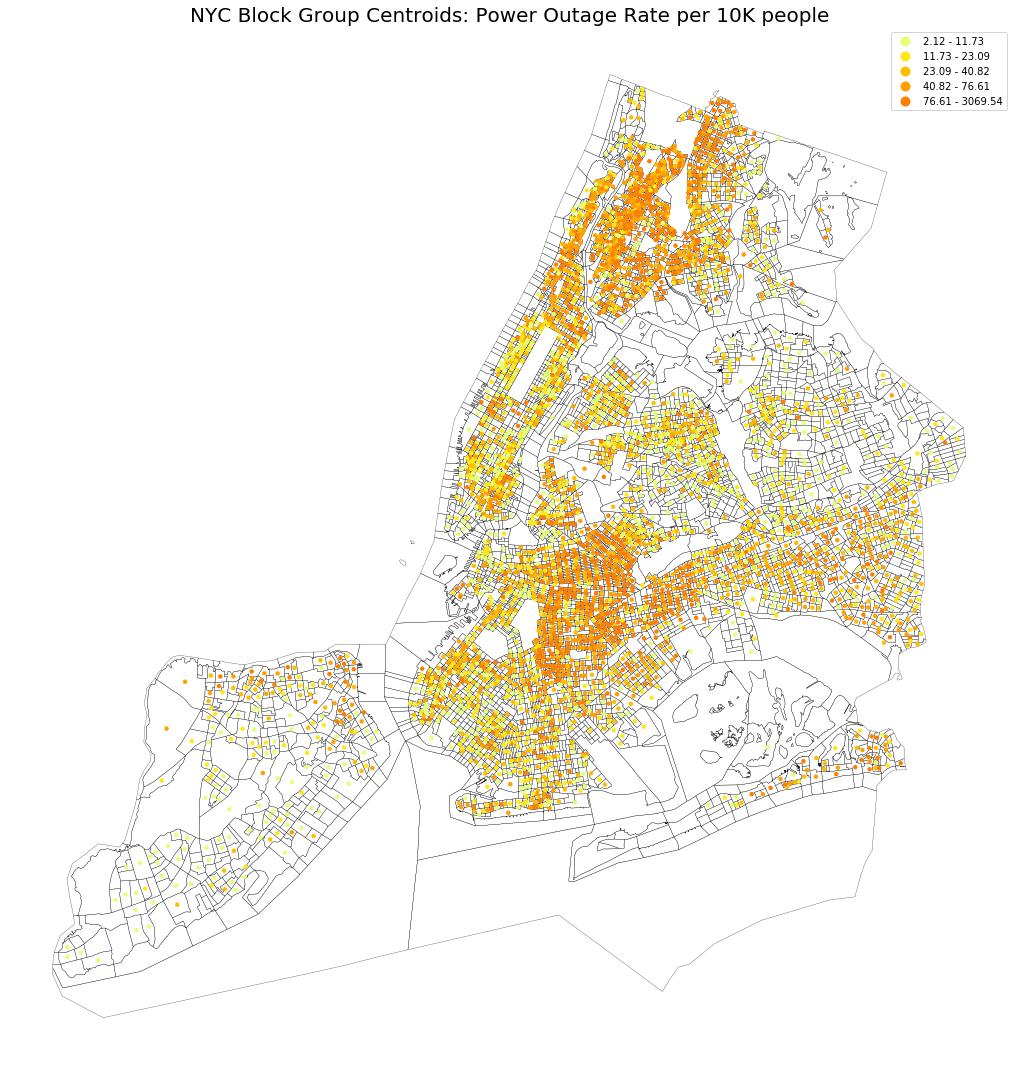

In [130]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (18,23)

base = NYC_BlockGroup_Shapes.plot(facecolor="none",edgecolor='black',lw=0.25,label="Block Group",legend=True)
NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA.plot(ax=base,column='Out_Rate_10K',scheme='quantiles',markersize=20,edgecolor='none',cmap='Wistia',legend=True)
plt.Axes.set_axis_off(base)
plt.legend
plt.title('NYC Block Group Centroids: Power Outage Rate per 10K people',fontsize=20)

Outage/Census Data geodataframe is now aggregated by block group centroids and ready to use in seaborn/DBSCAN

In [ ]:
NYCoutagewpop_NANfilewithlatandlong['geometry'].y

In [141]:
NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA['xms']=NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA['geometry'].x
NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA['yms']=NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA['geometry'].y
NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA.head()
NYCoutagewpop_NANfilewithlatandlong=NYCoutagewpop_spatialjointoblkgrps_Points_RemoveNA

In [86]:
#NYCoutagewpop_NANfilewithlatandlong.info()

In [143]:
#extracting lat, long 
#columns into a numpy matrix of coordinates/don't understand why you can't just use lat/long columns..
xs,ys = np.asarray(NYCoutagewpop_NANfilewithlatandlong.xms), np.asarray(NYCoutagewpop_NANfilewithlatandlong.yms)
NYCoutagewpop_NANfilewithlatandlong['xm']= xs.tolist() 
NYCoutagewpop_NANfilewithlatandlong['ym'] =ys.tolist()

In [145]:
NYCoutagewpop_NANfilewithlatandlong.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4459 entries, 0 to 6492
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   STATEFP           4459 non-null   object  
 1   COUNTYFP          4459 non-null   object  
 2   TRACTCE           4459 non-null   object  
 3   BLKGRPCE          4459 non-null   object  
 4   GEOID             4459 non-null   object  
 5   NAMELSAD          4459 non-null   object  
 6   MTFCC             4459 non-null   object  
 7   FUNCSTAT          4459 non-null   object  
 8   ALAND             4459 non-null   float64 
 9   AWATER            4459 non-null   float64 
 10  INTPTLAT          4459 non-null   object  
 11  INTPTLON          4459 non-null   object  
 12  Shape_Leng        4459 non-null   float64 
 13  Shape_Area        4459 non-null   float64 
 14  GEO_ID_DBL_left   4459 non-null   float64 
 15  geometry          4459 non-null   geometry
 16  index_right     

**Created a new version of the dataframe without the goemetry column because it cannot be sorted as part of quantile tranform function**

In [166]:
NYCoutagewpop_NANfilewithlatandlong_select=NYCoutagewpop_NANfilewithlatandlong[['Out_Rate_10K','MedHHInc_INT','xm','ym','geometry']]

NYCoutagewpop_NANfilewithlatandlong_select_copy2=NYCoutagewpop_NANfilewithlatandlong_select.copy()

NYCoutagewpop_NANfilewithlatandlong_select_dropgeo=NYCoutagewpop_NANfilewithlatandlong_select[['Out_Rate_10K','MedHHInc_INT','xm','ym']]

In [150]:
from sklearn.preprocessing import quantile_transform
X = np.sort(NYCoutagewpop_NANfilewithlatandlong_select_dropgeo)
quantile_transform(X, n_quantiles=4459, copy=False)

array([[0.47622252, 0.13346792, 0.92126514, 0.60924181],
       [0.96500673, 0.1897712 , 0.89681472, 0.59129655],
       [0.77882459, 0.18651862, 0.90601166, 0.60183939],
       ...,
       [0.46926873, 0.81505159, 0.3611485 , 0.26244953],
       [0.62584118, 0.79273217, 0.41431135, 0.35284881],
       [0.93517272, 0.9136384 , 0.35038134, 0.38425303]])

In [151]:
print(X[0])

[0.47622252 0.13346792 0.92126514 0.60924181]


In [152]:
dataset = pd.DataFrame(X,columns=['Outage_Rate_Quantile','MedHHInc_Quantile','xm_Quantile','ym_Quantile'])
dataset.info
dataset.describe()
#dataset.to_csv(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018NYCbyblkgrp_outage_quantiletransformresultcopyfalse.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Outage_Rate_Quantile  4459 non-null   float64
 1   MedHHInc_Quantile     4459 non-null   float64
 2   xm_Quantile           4459 non-null   float64
 3   ym_Quantile           4459 non-null   float64
dtypes: float64(4)
memory usage: 139.5 KB


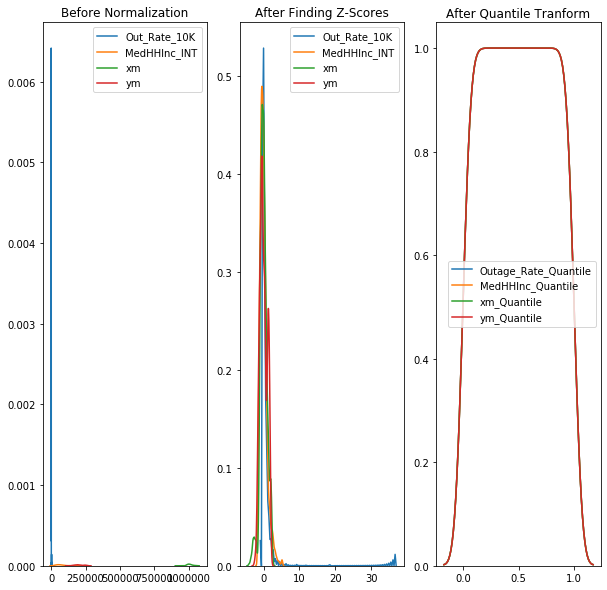

In [155]:
from scipy.stats import zscore
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,10))


NYCoutagewpop_NANfilewithlatandlong_select_copy=NYCoutagewpop_NANfilewithlatandlong_select.copy()
NYCoutagewpop_NANfilewithlatandlong_select_copy[['Out_Rate_10K','MedHHInc_INT','xm','ym']]= NYCoutagewpop_NANfilewithlatandlong_select_copy[['Out_Rate_10K','MedHHInc_INT','xm','ym']].apply(zscore)


ax1.set_title('Before Normalization')
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select['Out_Rate_10K'], ax=ax1)
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select['MedHHInc_INT'], ax=ax1)
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select['xm'], ax=ax1)
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select['ym'], ax=ax1)

ax2.set_title('After Finding Z-Scores')
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select_copy['Out_Rate_10K'], ax=ax2)
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select_copy['MedHHInc_INT'], ax=ax2)
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select_copy['xm'], ax=ax2)
sn.kdeplot(NYCoutagewpop_NANfilewithlatandlong_select_copy['ym'], ax=ax2)

ax3.set_title('After Quantile Tranform')
sn.kdeplot(dataset['Outage_Rate_Quantile'], ax=ax3)
sn.kdeplot(dataset['MedHHInc_Quantile'], ax=ax3)
sn.kdeplot(dataset['xm_Quantile'], ax=ax3)
sn.kdeplot(dataset['ym_Quantile'], ax=ax3)

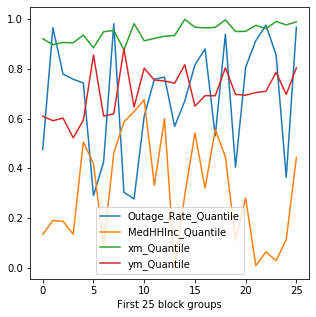

<Figure size 360x360 with 0 Axes>

In [162]:
#Differnce between each parameter for the first 25 block groups (not visible on quantile transform plot above)
%matplotlib inline
plt.rcParams["figure.figsize"] = (5,5)


ax=dataset[0:26].plot(legend=True)
fig = plt.figure()
ax.set_xlabel('First 25 block groups')
ax.set_xlabel('First 25 block groups')

ax.legend(loc='best')

0.07829233278800002


<Figure size 360x360 with 0 Axes>

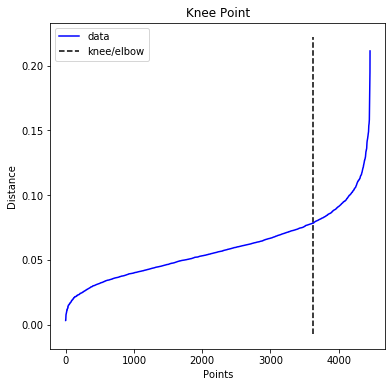

In [164]:
from kneed import KneeLocator, DataGenerator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=0, curve='convex', direction='increasing', interp_method='polynomial',online=True)
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

#S is a sensitivity paramter, Put simply, S is a measure of how many “flat” points we expect to see 
#in the unmodified data curve before declaring a knee.
print(distances[knee.knee])

In [170]:
#Epsilon Value from plot above, using min_samples=8 for DBSCAN Clustering
from sklearn.cluster import DBSCAN
import sklearn.utils

epsilon=0.0783 #epsilon value provided by kneelocator above
NYCoutagewpop_cluster5 = dataset[['Outage_Rate_Quantile','MedHHInc_Quantile','xm_Quantile','ym_Quantile']].copy()

db=DBSCAN(eps=epsilon,min_samples=8,metric='euclidean').fit(NYCoutagewpop_cluster5)

labels = db.labels_ #tells you which cluster the model assigned to each data point
NYCoutagewpop_NANfilewithlatandlong_select_copy2['Clust_Grp9']=labels #TRIED adding new cluster labels column to your ORIGINAL 
#dataset..got error message below

#realClusterNum=len(set(labels)) - 1
clusterNum = len(set(labels))
#print(realClusterNum) 
print(clusterNum) #Total of 39 clusters including outliers
NYCoutagewpop_NANfilewithlatandlong_select_copy2.info()
NYCoutagewpop_NANfilewithlatandlong_select_copy2.to_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018wpoeroutages_afterquantiletranformGrp9.shp')

39
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4459 entries, 0 to 6492
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Out_Rate_10K  4459 non-null   float64 
 1   MedHHInc_INT  4459 non-null   float64 
 2   xm            4459 non-null   float64 
 3   ym            4459 non-null   float64 
 4   geometry      4459 non-null   geometry
 5   Clust_Grp9    4459 non-null   int64   
dtypes: float64(4), geometry(1), int64(1)
memory usage: 243.9 KB


In [173]:
list(NYCoutagewpop_NANfilewithlatandlong_select_copy2)

['Out_Rate_10K', 'MedHHInc_INT', 'xm', 'ym', 'geometry', 'Clust_Grp9']

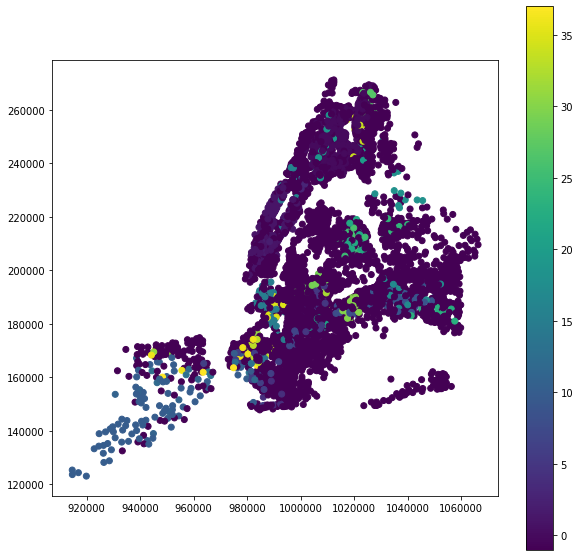

In [179]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

NYCoutagewpop_NANfilewithlatandlong_select_copy2.plot(column='Clust_Grp9', legend=True)


In [180]:
import hdbscan

In [181]:
clusterer = hdbscan.HDBSCAN()

In [182]:
 clusterer.fit(dataset)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [183]:
clusterer.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [184]:
clusterer.labels_.max()

1

In [185]:
len(clusterer.labels_)clusterNum = len(set(labels))

SyntaxError: invalid syntax (<ipython-input-185-8084d845843c>, line 1)

In [ ]:
clusterNum = len(set(clusterer.labels_))
print(clusterNum) #there are a total of two clusters and one outlier for this dataset

In [ ]:
clusterer.condensed_tree_.to_pandas().info()

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (18,18)

clusterer.condensed_tree_.plot(select_clusters=True,selection_palette=sn.color_palette('deep', 8))

In [ ]:
NYCoutagewpop_NANfilewithlatandlong_select_copy3=NYCoutagewpop_NANfilewithlatandlong_select.copy()

In [ ]:
NYCoutagewpop_NANfilewithlatandlong_select_copy3["HDBSCAN_labels"]=clusterer.labels_

In [ ]:
#NYCoutagewpop_NANfilewithlatandlong_select_copy3.to_file(r'C:\Users\CHerbert\Downloads\GeoComp2\ElectricalOutageProject\RawData_PowerOutageProjectbyblkgrp\ACS2018wpoeroutages_HDBSCANResult.shp')